<a href="https://colab.research.google.com/github/divsal009/div/blob/master/layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import PIL
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import h5py
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
if not os.path.exists('/content/drive/My Drive/Colab Notebooks/dataset1'):
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset1')

In [4]:
with zipfile.ZipFile('/content/drive/My Drive/Colab Notebooks/dataset1/data.zip') as zf:
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/My Drive/Colab Notebooks/dataset1')

In [5]:
!ls '/content/drive/My Drive/Colab Notebooks/dataset1/'

brainTumorDataPublic_1533-2298.zip  cvind.mat
brainTumorDataPublic_1-766.zip	    data.zip
brainTumorDataPublic_2299-3064.zip  README.txt
brainTumorDataPublic_767-1532.zip


In [6]:
!cat '/content/drive/My Drive/Colab Notebooks/dataset1/README.txt'

This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images
from 233 patients with three kinds of brain tumor: meningioma (708 slices), 
glioma (1426 slices), and pituitary tumor (930 slices). Due to the file size
limit of repository, we split the whole dataset into 4 subsets, and achive 
them in 4 .zip files with each .zip file containing 766 slices.The 5-fold
cross-validation indices are also provided.

-----
This data is organized in matlab data format (.mat file). Each file stores a struct
containing the following fields for an image:

cjdata.label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor
cjdata.PID: patient ID
cjdata.image: image data
cjdata.tumorBorder: a vector storing the coordinates of discrete points on tumor border.
		For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border.
		It was generated by manually delineating the tumor border. So we can use it to generate
		binary image of tumor mask.
cjdata.tumorMask: a

In [7]:
with zipfile.ZipFile('/content/drive/My Drive/Colab Notebooks/dataset1/brainTumorDataPublic_1-766.zip') as zf:
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset1/bt_set1')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/My Drive/Colab Notebooks/dataset1/bt_set1')

In [8]:
with zipfile.ZipFile('/content/drive/My Drive/Colab Notebooks/dataset1/brainTumorDataPublic_767-1532.zip') as zf:
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset1/bt_set2')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/My Drive/Colab Notebooks/dataset1/bt_set2')

In [9]:
with zipfile.ZipFile('/content/drive/My Drive/Colab Notebooks/dataset1/brainTumorDataPublic_1533-2298.zip') as zf:
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset1/bt_set3')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/My Drive/Colab Notebooks/dataset1/bt_set3')

In [10]:
with zipfile.ZipFile('/content/drive/My Drive/Colab Notebooks/dataset1/brainTumorDataPublic_2299-3064.zip') as zf:
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset1/bt_set4')
  zip_dir = zf.namelist()[0]
  zf.extractall('/content/drive/My Drive/Colab Notebooks/dataset1/bt_set4')

In [11]:
os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset1/imageData')

In [12]:
!mv /content/drive/'My Drive'/'Colab Notebooks'/dataset1/bt_set1/*.mat '/content/drive/My Drive/Colab Notebooks/dataset1/imageData/'
!mv /content/drive/'My Drive'/'Colab Notebooks'/dataset1/bt_set2/*.mat '/content/drive/My Drive/Colab Notebooks/dataset1/imageData/'
!mv /content/drive/'My Drive'/'Colab Notebooks'/dataset1/bt_set3/*.mat '/content/drive/My Drive/Colab Notebooks/dataset1/imageData/'
!mv /content/drive/'My Drive'/'Colab Notebooks'/dataset1/bt_set4/*.mat '/content/drive/My Drive/Colab Notebooks/dataset1/imageData/'

In [ ]:
arrays = {}
img = None

cjdata
('cjdata', <HDF5 group "/cjdata" (5 members)>)
PID <HDF5 dataset "PID": shape (6, 1), type "<u2">
image <HDF5 dataset "image": shape (512, 512), type "<i2">
label <HDF5 dataset "label": shape (1, 1), type "<f8">
tumorBorder <HDF5 dataset "tumorBorder": shape (1, 38), type "<f8">
tumorMask <HDF5 dataset "tumorMask": shape (512, 512), type "|u1">
Image shape:  (512, 512)
Label 1.0
Coords:  [267.61524501 231.37568058 277.83666062 248.10163339 289.91651543
 250.8892922  305.71324864 253.676951   318.72232305 249.9600726
 321.50998185 237.88021779 354.96188748 234.16333938 367.97096189
 227.65880218 380.9800363  210.93284936 372.61705989 195.13611615
 363.32486388 177.48094374 350.31578947 176.55172414 336.37749546
 183.98548094 317.79310345 196.06533575 305.71324864 207.21597096
 295.49183303 217.43738657 288.98729583 222.08348457 273.19056261
 223.94192377 268.54446461 228.58802178]
Mask shape:  (512, 512)


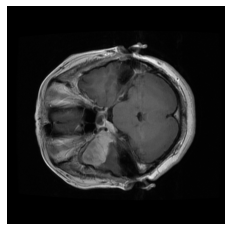

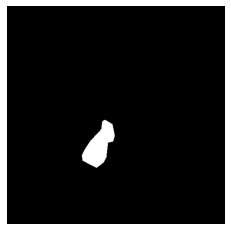

In [13]:
with h5py.File('/content/drive/My Drive/Colab Notebooks/dataset1/imageData/1.mat', 'r') as f:
    for key in f.keys():
      print(key)
    for item in f.items():
      print(item)
    for key, val in f['cjdata'].items():
      print(key, val)
    img = f['cjdata']['image']
    label = f['cjdata']['label'][0][0]
    tumorBorder = f['cjdata']['tumorBorder'][0]
    mask = f['cjdata']['tumorMask']
    fig = plt.figure(2)
    img = np.array(img, dtype=np.float32)
    img = img/127.5 - 1
    mask = np.array(mask, dtype=np.float32)
    mask = mask/127.5 - 1
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    print("Image shape: ", img.shape)
    print("Label", label)
    print("Coords: ", tumorBorder)
    print("Mask shape: ", mask.shape)
    fig = plt.figure(3)
    plt.axis('off')
    plt.imshow(mask, cmap='gray')

In [14]:
os.mkdir('/content/drive/My Drive/Colab Notebooks/new_dataset')
os.mkdir('/content/drive/My Drive/Colab Notebooks/new_dataset/bt_images')

In [15]:
labels = []

In [16]:
from openpyxl.styles import Border, Side

3064 files successfully saved


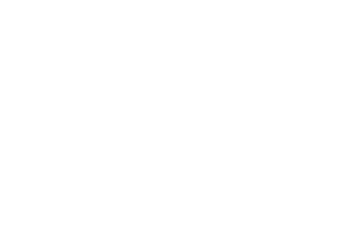

In [17]:
filename = None

for filename in range(1, 3065):
  with h5py.File('/content/drive/My Drive/Colab Notebooks/dataset1/imageData/{}.mat'.format(filename), 'r') as f:
      img = f['cjdata']['image']
      label = f['cjdata']['label'][0][0]
     
     
      labels.append(int(label))
      
     # border.append(coord)
      img = np.array(img, dtype=np.float32)
      
      plt.axis('off')
      plt.imsave("/content/drive/My Drive/Colab Notebooks/new_dataset/bt_images/{}.jpg".format(filename), img, cmap='gray')
      
      
print("{} files successfully saved".format(filename))

In [18]:
label_names = np.array(labels, dtype=np.int64)

In [19]:
label_names.shape

(3064,)

In [20]:
pickle_out = open("/content/drive/My Drive/Colab Notebooks/new_dataset/labels.pickle","wb")                    
pickle.dump(label_names, pickle_out)
pickle_out.close()

In [21]:
training_data = []
img = None
label = None
i = None

In [22]:
for i in range(1, 3065):
  img = cv2.imread("/content/drive/My Drive/Colab Notebooks/new_dataset/bt_images/{}.jpg".format(i), cv2.IMREAD_GRAYSCALE)
  img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
  img = cv2.resize(img, (512, 512))
  label = labels[i-1]
  training_data.append([img, label])

print("shape: {} label: {} | {} samples successfully preprocessed".format(img.shape, label, i))

pickle_out = open("/content/drive/My Drive/Colab Notebooks/new_dataset/training_data.pickle","wb")                    
pickle.dump(training_data, pickle_out)
pickle_out.close()

shape: (512, 512, 3) label: 1 | 3064 samples successfully preprocessed


####################################BRAIN TUMOR#################################################################################

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
import os
import random
import numpy as np
import pandas as pd
import pickle
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, jaccard_similarity_score
from google.colab import drive

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
torch.cuda.empty_cache()

In [25]:
class BrainTumorDataset(Dataset):
  def __init__(self, images, labels):
    # images
    self.X = images
    # labels
    self.y = labels
    
    # Transformation for converting original image array to an image and then convert it to a tensor
    self.transform = transforms.Compose([transforms.ToPILImage(),
        transforms.ToTensor()
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -45 degrees and 45 degrees, and then convert it to a tensor
    self.transform1 = transforms.Compose([
        transforms.ToPILImage(),                                          
        transforms.RandomRotation(45),
        transforms.ToTensor()                                  
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -90 degrees and 90 degrees, and then convert it to a tensor
    self.transform2 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(90),
        transforms.ToTensor()                                  
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -120 degrees and 120 degrees, and then convert it to a tensor
    self.transform3 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(120),
        transforms.ToTensor()                                  
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -180 degrees and 180 degrees, and then convert it to a tensor
    self.transform4 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(180),
        transforms.ToTensor()                                  
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -270 degrees and 270 degrees, and then convert it to a tensor
    self.transform5 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(270),
        transforms.ToTensor()                                  
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -300 degrees and 300 degrees, and then convert it to a tensor
    self.transform6 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(300),
        transforms.ToTensor()                                  
    ])

    # Transformation for converting original image array to an image, rotate it randomly between -330 degrees and 330 degrees, and then convert it to a tensor
    self.transform7 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(330),
        transforms.ToTensor()                                  
    ])

  def __len__(self):
    # return length of image samples
    return len(self.X)

  def __getitem__(self, idx):
    # perform transformations on one instance of X
    # Original image as a tensor
    data = self.transform(self.X[idx])

    # Augmented image at 45 degrees as a tensor
    aug45 = self.transform1(self.X[idx])

    # Augmented image at 90 degrees as a tensor
    aug90 = self.transform2(self.X[idx])

    # Augmented image at 120 degrees as a tensor
    aug120 = self.transform3(self.X[idx])

    # Augmented image at 180 degrees as a tensor
    aug180 = self.transform4(self.X[idx])

    # Augmented image at 270 degrees as a tensor
    aug270 = self.transform5(self.X[idx])

    # Augmented image at 300 degrees as a tensor
    aug300 = self.transform6(self.X[idx])

    # Augmented image at 330 degrees as a tensor
    aug330 = self.transform7(self.X[idx])      
    
    # store the transformed images in a list
    new_batch = [data, aug45, aug90, aug120, aug180, aug270, aug300, aug330]

    # convert labels to the format output by our classifier
    # 1, 2, 3 = 0, 1, 2
    # store the network's understandable label as a tensor
    labels = torch.tensor((self.y[idx]-1))

    # return the label and list of augmented images a tuple
    # 8 augmented images per sample will be returned
    return (labels, new_batch)

In [26]:
training_data = pickle.load(open('/content/drive/My Drive/Colab Notebooks/new_dataset/training_data.pickle', 'rb'))

In [27]:
Xt = []
yt = []
features = None
labels = None
label = []

In [28]:
for features,labels in training_data:
  Xt.append(features)
  yt.append(labels)

In [29]:
# 70 % training, 15% validating, 15% testing
random.seed(51)
X_train, X_test, y_train, y_test = train_test_split(Xt, yt, test_size=0.3, shuffle=True, random_state=33)  # 70% training, 30% testing
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, random_state=33)  # split testing set into 50% validation , 50% testing

In [30]:
Xt = None
yt = None
features = None
labels = None
label = None
training_data = None

In [31]:
train_set = BrainTumorDataset(X_train, y_train)
valid_set = BrainTumorDataset(X_valid, y_valid)
test_set = BrainTumorDataset(X_test, y_test)

In [32]:
print(f"Number of training samples: {len(X_train)}")
print(f"Number of validation samples: {len(X_valid)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 2144
Number of validation samples: 460
Number of testing samples: 460


In [33]:
print(f"Number of augmented training samples: {len(X_train) * 8}")
print(f"Number of augmented validation samples: {len(X_valid)* 8}")
print(f"Number of augmented testing samples: {len(X_test)* 8}")

Number of augmented training samples: 17152
Number of augmented validation samples: 3680
Number of augmented testing samples: 3680


In [34]:
train_gen = DataLoader(train_set, batch_size=4, shuffle=True, pin_memory=True, num_workers=8)
valid_gen = DataLoader(valid_set, batch_size=4, shuffle=True, pin_memory=True, num_workers=8)
test_gen = DataLoader(test_set, batch_size=10, shuffle=True, pin_memory=True, num_workers=8)

In [35]:
device_name = "cuda:0:" if torch.cuda.is_available() else "cpu"
device = torch.device(device_name)

In [36]:
# instantiate transfer learning model
resnet_model = models.resnet50(pretrained=True)

# set all paramters as trainable
for param in resnet_model.parameters():
    param.requires_grad = True

# get input of fc layer
n_inputs = resnet_model.fc.in_features

# redefine fc layer / top layer/ head for our classification problem
resnet_model.fc = nn.Sequential(nn.Linear(n_inputs, 2048),
                                nn.LeakyReLU(negative_slope=0.2),
                                nn.Dropout(p=0.3),
                                nn.Linear(2048, 2048),
                                nn.LeakyReLU(negative_slope=0.2),
                                nn.Dropout(p=0.3),
                                nn.Linear(2048, 3),
                                nn.LogSoftmax(dim=1))

# set all paramters of the model as trainable
for name, child in resnet_model.named_children():
  for name2, params in child.named_parameters():
    params.requires_grad = True

# set model to run on GPU or CPU absed on availibility
resnet_model.to(device)

# print the trasnfer learning NN model's architecture
resnet_model

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [41]:
from torchsummary import summary

In [42]:

import torchvision.models as models


In [43]:
resnet_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [46]:


summary(resnet_model, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
# loss function
# if GPU is available set loss function to use GPU
if device_name=="cuda:0:":
  criterion = nn.CrossEntropyLoss().cuda()
else:
  criterion = nn.CrossEntropyLoss()  

# optimizer
optimizer = torch.optim.SGD(resnet_model.parameters(), momentum=0.9, lr=0.0003)

# number of training iterations
epochs = 6

# empty lists to store losses and accuracies
train_losses = []
test_losses = []
train_correct = []
test_correct = []

In [ ]:
def save_checkpoint(state, is_best, filename='/content/drive/My Drive/bt_total_resnet_checkpoint.pth.tar'):
    torch.save(state, filename)

In [ ]:
# set training start time
start_time = time.time()

# set best_prec loss value as 2 for checkpoint threshold
best_prec1 = 2

# empty batch variables
b = None
train_b = None
test_b = None

# start training
for i in range(epochs):
    # empty training correct and test correct counter as 0 during every iteration
    trn_corr = 0
    tst_corr = 0
    
    # set epoch's starting time
    e_start = time.time()
    
    # train in batches
    for b, (y, X) in enumerate(train_gen):
        # set label as cuda if device is cuda
        if device_name=="cuda:0:":
          y = y.cuda()

        # for images present in list of augmented images
        for images in X:
          # set image as cuda if device is cuda
          if device_name=="cuda:0:":
            images = images.cuda()

          # forward pass image sample
          y_pred = resnet_model(images)
          # calculate loss
          loss = criterion(y_pred, y)
  
          # get argmax of predicted tensor, which is our label
          predicted = torch.max(y_pred.data, 1)[1]
          # if predicted label is correct as true label, calculate the sum for samples
          batch_corr = (predicted == y).sum()
          # increment train correct with correcly predicted labels per batch
          trn_corr += batch_corr
          
          # set optimizer gradients to zero
          optimizer.zero_grad()
          # back propagate with loss
          loss.backward()
          # perform optimizer step
          optimizer.step()

    # set epoch's end time
    e_end = time.time()
    # print training metrics
    print(f'Epoch {(i+1)} Batch {(b+1)*4}\nAccuracy: {trn_corr.item()*100/(4*8*b):2.2f} %  Loss: {loss.item():2.4f}  Duration: {((e_end-e_start)/60):.2f} minutes') # 4 images per batch * 8 augmentations per image * batch length

    # some metrics storage for visualization
    train_b = b
    train_losses.append(loss)
    train_correct.append(trn_corr)

    # validate using validation generator
    # do not perform any gradient updates while validation
    with torch.no_grad():
        for b, (y, X) in enumerate(valid_gen):
            # set label as cuda if device is cuda
            if device_name=="cuda:0:":            
              y = y.cuda()

            # for images present in list of augmented images
            for images in X:
                # set image as cuda if device is cuda
                if device_name=="cuda:0:":
                  images = images.cuda()
                
                # forward pass image
                y_val = resnet_model(images)

                # get argmax of predicted tensor, which is our label
                predicted = torch.max(y_val.data, 1)[1] 

                # increment test correct with correcly predicted labels per batch
                tst_corr += (predicted == y).sum()

    # get loss of validation set
    loss = criterion(y_val, y)
    # print validation metrics
    print(f'Validation Accuracy {tst_corr.item()*100/(4*8*b):2.2f} Validation Loss: {loss.item():2.4f}\n')

    # if current validation loss is less than previous iteration's validatin loss create and save a checkpoint
    is_best = loss < best_prec1
    best_prec1 = min(loss, best_prec1)
    save_checkpoint({
            'epoch': i + 1,
            'state_dict': resnet_model.state_dict(),
            'best_prec1': best_prec1,
        }, is_best, filename=os.path.join('/content/drive/My Drive/', 'bt_total_resnet_checkpoint_{}.pth.tar'.format(i)))

    # some metrics storage for visualization
    test_b  = b
    test_losses.append(loss)
    test_correct.append(tst_corr)
# set total training's end time
end_time = time.time() - start_time    

# print training summary
print("\nTraining Duration {:.2f} minutes".format(end_time/60))
print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
print("GPU memory cached : {} kb".format(torch.cuda.memory_cached()))

Epoch 1 Batch 2144
Accuracy: 78.71 %  Loss: 0.1770  Duration: 19.30 minutes
Validation Accuracy 80.32 Validation Loss: 0.8975

Epoch 2 Batch 2144
Accuracy: 90.55 %  Loss: 0.0449  Duration: 19.31 minutes
Validation Accuracy 89.64 Validation Loss: 0.0604

Epoch 3 Batch 2144
Accuracy: 92.37 %  Loss: 0.1125  Duration: 19.36 minutes
Validation Accuracy 92.38 Validation Loss: 0.0247

Epoch 4 Batch 2144
Accuracy: 94.92 %  Loss: 0.0018  Duration: 19.33 minutes
Validation Accuracy 92.76 Validation Loss: 0.0632

Epoch 5 Batch 2144
Accuracy: 96.77 %  Loss: 0.0229  Duration: 19.35 minutes
Validation Accuracy 93.83 Validation Loss: 0.0006

Epoch 6 Batch 2144
Accuracy: 96.48 %  Loss: 0.0015  Duration: 19.36 minutes
Validation Accuracy 97.37 Validation Loss: 0.0468


Training Duration 124.42 minutes
GPU memory used : 400193536 kb
GPU memory cached : 2350907392 kb


In [ ]:
torch.save(resnet_model.state_dict(), '/content/drive/My Drive/bt_total_resnet_torch.pt')

In [ ]:
print(f'Validation accuracy: {test_correct[-1].item()*100/(test_b*8*4):.2f}%')

Validation accuracy: 97.37%


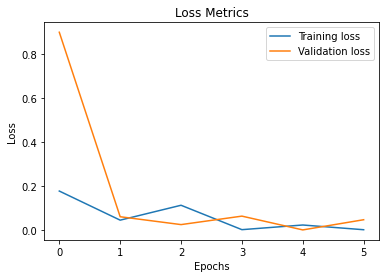

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.title('Loss Metrics')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

/pytorch/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


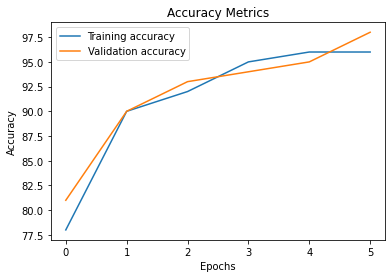

In [ ]:
plt.plot([t/171 for t in train_correct], label='Training accuracy')
plt.plot([t/36 for t in test_correct], label='Validation accuracy')
plt.title('Accuracy Metrics')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
# resnet_model.load_state_dict(torch.load('/content/drive/My Drive/bt_resnet_torch.pt'))
train_gen = None
valid_gen = None
train_set = None
valid_set = None

In [ ]:
# set model to evaluation mode
resnet_model.eval()

# perform no gradient updates
with torch.no_grad():
    # soem metrics storage for visualization and analysis
    correct = 0
    test_loss = []
    test_corr = []
    labels = []
    pred = []
    # perform test set evaluation batch wise
    for (y, X) in test_gen:
        # set label to use CUDA if available
        if device_name=="cuda:0:":
          y = y.cuda()

        # for images present in list of augmented images  
        for images in X:
        # set image as cuda if device is cuda
          if device_name=="cuda:0:":
            images = images.cuda()
          
          # append original labels
          labels.append(y)

          # perform forward pass
          y_val = resnet_model(images)

          # get argmax of predicted values, which is our label
          predicted = torch.max(y_val,1)[1]
          # append predicted label
          pred.append(predicted)

          # calculate loss
          loss = criterion(y_val, y)

          # increment correct with correcly predicted labels per batch
          correct += (predicted == y).sum()

          # append correct samples labels and losses
          test_corr.append(correct)
          test_loss.append(loss)
          # print(f"True: {y.cpu().numpy()}  Pred: {predicted.cpu().numpy()}")
          
print(f"Test Loss: {test_loss[-1].item():.4f}")

Test Loss: 0.1687


In [ ]:
print(f'Test accuracy: {test_corr[-1].item()*100/(460*8):.2f}%')

Test accuracy: 96.44%


In [ ]:
labels = torch.stack(labels)
pred = torch.stack(pred)

In [ ]:
LABELS = ['Meningioma', 'Glioma', 'Pitutary']

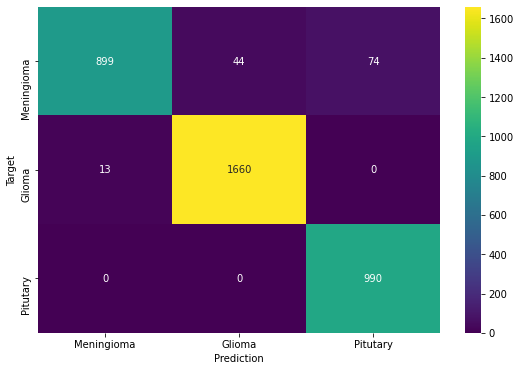

In [ ]:
arr = confusion_matrix(pred.view(-1).cpu(), labels.view(-1).cpu())
df_cm = pd.DataFrame(arr, LABELS, LABELS)
plt.figure(figsize = (9,6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.show()

In [ ]:
print(f"Clasification Report\n\n{classification_report(pred.view(-1).cpu(), labels.view(-1).cpu())}")

Clasification Report

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1017
           1       0.97      0.99      0.98      1673
           2       0.93      1.00      0.96       990

    accuracy                           0.96      3680
   macro avg       0.96      0.96      0.96      3680
weighted avg       0.97      0.96      0.96      3680



In [ ]:
print(f"Jaccard Index\n\n{round(jaccard_similarity_score(pred.view(-1).cpu(), labels.view(-1).cpu()), 2)}")

Jaccard Index

0.95


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# **Test**

In [ ]:
import os
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import transforms, models

device_name = "cuda:0:" if torch.cuda.is_available() else "cpu"
device = torch.device(device_name)

resnet_model = models.resnet50(pretrained=True)


In [ ]:
for param in resnet_model.parameters():
    param.requires_grad = True

n_inputs = resnet_model.fc.in_features

resnet_model.fc = nn.Sequential(nn.Linear(n_inputs, 2048),
                nn.LeakyReLU(negative_slope=0.2),
                nn.Dropout(p=0.4),
                nn.Linear(2048, 2048),
                nn.LeakyReLU(negative_slope=0.2),
                nn.Dropout(p=0.4),
                nn.Linear(2048, 3),
                nn.LogSoftmax(dim=1))

for name, child in resnet_model.named_children():
    for name2, params in child.named_parameters():
        params.requires_grad = True

resnet_model.to(device)

resnet_model.load_state_dict(torch.load('/content/drive/My Drive/bt_total_resnet_torch.pt'))

resnet_model.eval()

transform = transforms.Compose([transforms.Resize((512, 512)), transforms.ToTensor()])

LABELS = ['Meningioma', 'Glioma', 'Pitutary']

img_name = input("Enter path to the image: ")

if not os.path.exists(img_name):
    print("File does not exits. Exiting...\n")
    exit()

img = Image.open(img_name)

img = transform(img)

img = img[None, ...]

if device_name=="cuda:0:":
    img = img.cuda()

with torch.no_grad():
    y_hat = resnet_model.forward(img)

    predicted = torch.max(y_hat.data, 1)[1] 

    print(LABELS[predicted.data],'\n')

Enter path to the image: /content/test1.jpg
Meningioma 

